In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow==2.0.0-beta1
!pip install tensorflow-gpu==2.0.0-beta1

In [3]:
# all needed modules
# python standart modules
import random
import itertools
from collections import Counter
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8")) # it is needed whenever load your own custom data

#anaconda scientific modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

# machine learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
# import keras #keras is now inside of tensorflow
import tensorflow.keras as K
print(f"check the Tensorflow version: {tf.__version__}")
print(f"check the available devices: {device_lib.list_local_devices()}")

check the Tensorflow version: 2.0.0-beta1
check the available devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17543029904133871477
]


In [4]:
# load the data
# for a hello world application, I am using mnist dataset.
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalization is the squish the all values between (a,b).
# In this case this values are (0,1)
x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

Total number of outputs :  10


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
random_image = [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0

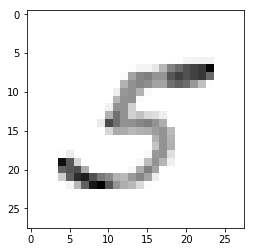

In [5]:
# inpect the data
# data has been normalized.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# choose a random sample
randidx = random.randint(0,x_train.shape[0])
random_image = x_train[randidx]
random_image_label = y_train[randidx]
# show the image
plt.imshow(random_image, cmap = plt.cm.binary)
plt.show()
print(f"random_image = {random_image}")
print(f"random_image_label = {random_image_label}")

In [14]:
# define the network
# in this case it is sequential ANN
# actually no need to flatten but dense or linear layer needs flatten an input
# or you can use InputLayer or conv-layerrs
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=keras.activations.relu))
model.add(keras.layers.Dense(128, activation=keras.activations.relu))
# probobality distribution to give a number between (0,1) ;)
model.add(keras.layers.Dense(nClasses, activation=keras.activations.softmax))

# Primer goal of the network is minimazing the loss.
# loss is the purpose function. What do you want on the data.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# run the trainer
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2629 - accuracy: 0.9221
Epoch 2/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1056 - accuracy: 0.9674
Epoch 3/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0734 - accuracy: 0.9771


In [15]:
# save the model
model.save('epic_num_reader.model')

In [16]:
# load the model to use again.
new_model = keras.models.load_model('epic_num_reader.model')

In [17]:
# check the if model overfitting?
test_predictions = new_model.predict([x_test])
print(f"all probabilities: {test_predictions}") # probobality distribution

all probabilities: [[2.5680984e-09 1.8047803e-07 6.2424024e-06 ... 9.9997497e-01
  5.5553279e-08 1.9160608e-07]
 [4.2639928e-10 1.6643840e-03 9.9831772e-01 ... 1.1616613e-08
  1.2885229e-06 6.1958949e-12]
 [9.7282493e-10 9.9969614e-01 4.7987965e-06 ... 1.7070770e-04
  1.0348260e-04 8.9135796e-07]
 ...
 [9.7720865e-10 2.0803188e-07 2.9814242e-08 ... 2.7093274e-05
  4.7905137e-06 5.7252438e-04]
 [1.0745744e-05 1.2994807e-06 1.0305388e-06 ... 9.8184155e-06
  6.6207601e-03 8.2802208e-06]
 [1.3096094e-06 1.9942361e-08 9.9226270e-07 ... 2.1262916e-10
  9.4787987e-07 1.3513979e-07]]


7


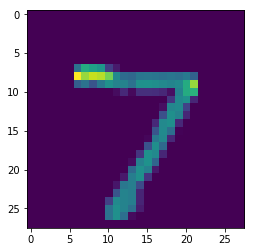

In [18]:
print(np.argmax(test_predictions[0]))
plt.imshow(x_test[0])
plt.show()

[[9.92857143e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.02040816e-03 2.04081633e-03
  3.06122449e-03 1.02040816e-03]
 [0.00000000e+00 9.87665198e-01 8.81057269e-04 8.81057269e-04
  0.00000000e+00 0.00000000e+00 8.81057269e-04 1.76211454e-03
  7.92951542e-03 0.00000000e+00]
 [4.84496124e-03 4.84496124e-03 9.35077519e-01 1.74418605e-02
  1.93798450e-03 0.00000000e+00 1.93798450e-03 1.55038760e-02
  1.84108527e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.98019802e-03 9.79207921e-01
  9.90099010e-04 7.92079208e-03 0.00000000e+00 2.97029703e-03
  2.97029703e-03 3.96039604e-03]
 [1.01832994e-03 0.00000000e+00 5.09164969e-03 0.00000000e+00
  9.57230143e-01 0.00000000e+00 4.07331976e-03 2.03665988e-03
  3.05498982e-03 2.74949084e-02]
 [3.36322870e-03 0.00000000e+00 0.00000000e+00 2.24215247e-02
  0.00000000e+00 9.48430493e-01 7.84753363e-03 1.12107623e-03
  1.00896861e-02 6.72645740e-03]
 [1.04384134e-02 2.08768267e-03 1.04384134e-03 1.04384134e

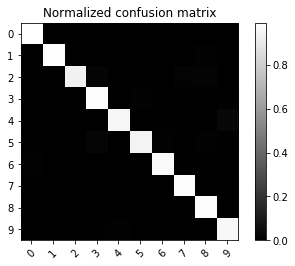

In [19]:
confusion = confusion_matrix(y_true =y_test, y_pred =np.argmax(test_predictions,axis=1))
confusion = confusion.astype('float') / confusion.sum(axis = 1)[:, np.newaxis]
print(confusion)
# plot
plt.imshow(confusion, cmap = 'gray')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(nClasses)
plt.xticks(tick_marks, np.arange(nClasses), rotation=45)
plt.yticks(tick_marks, np.arange(nClasses))
plt.show()